In [1]:
import pandas as pd
import os

%matplotlib inline

from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [3]:
pd.options.display.float_format = '{:0,.0f}'.format

In [4]:
# Relative path between notebooks and goruped output directories
relative_path = '../../../outputs/grouped'

In [5]:
tod_dict = {
    '5to6': 'AM',
    '6to7': 'AM',
    '7to8': 'AM',
    '8to9': 'AM',
    '9to10': 'Mid-Day',
    '10to14': 'Mid-Day',
    '14to15': 'Mid-Day',
    '15to16': 'PM',
    '16to17': 'PM',
    '17to18': 'PM',
    '18to20': 'Evening',
    '20to5': 'Night'
}

## Vehicle Miles Traveled (VMT)

In [6]:
df = pd.read_csv(os.path.join(relative_path,'net_summary.csv'))
df['time_period'] = df['tod'].apply(lambda row: tod_dict[row])

# VMT by Facility Type
df_dict = {}
for source in df.groupby('source').count().index.tolist():
    df_dict[source] = df[df['source'] == source]
    
df_fac = pd.DataFrame(df_dict[i][df_dict[i]['metric']=='vmt'].groupby('facility_type').sum()['value'] for i in df_dict.keys()).T
df_fac.columns=[i for i in df_dict.keys()]
df_fac.loc['Total'] = df_fac.sum()

# VMT by Time of Day        
df_tod = pd.DataFrame(df_dict[i][df_dict[i]['metric']=='vmt'].groupby('time_period').sum()['value'] for i in df_dict.keys()).T
df_tod.columns=[i for i in df_dict.keys()]
df_tod.loc['Total'] = df_tod.sum()
display(df_fac)
display(df_tod)

,sc_2025_20_5
facility_type,
arterial,"37,857,548"
connectors,"5,445,342"
highway,"49,253,326"
Total,"92,556,215"


,sc_2025_20_5
time_period,
AM,"21,674,072"
Evening,"11,582,191"
Mid-Day,"30,854,643"
Night,"6,558,330"
PM,"21,886,979"
Total,"92,556,215"


## Vehicle Hours Traveled (VHT)

In [7]:
df = pd.read_csv(os.path.join(relative_path,'net_summary.csv'))
df['time_period'] = df['tod'].apply(lambda row: tod_dict[row])

# VMT by Facility Type
df_dict = {}
for source in df.groupby('source').count().index.tolist():
    df_dict[source] = df[df['source'] == source]
    
df_fac = pd.DataFrame(df_dict[i][df_dict[i]['metric']=='vht'].groupby('facility_type').sum()['value'] for i in df_dict.keys()).T
df_fac.columns=[i for i in df_dict.keys()]
df_fac.loc['Total'] = df_fac.sum()

# VMT by Time of Day        
df_tod = pd.DataFrame(df_dict[i][df_dict[i]['metric']=='vht'].groupby('time_period').sum()['value'] for i in df_dict.keys()).T
df_tod.columns=[i for i in df_dict.keys()]
df_tod.loc['Total'] = df_tod.sum()
display(df_fac)
display(df_tod)

,sc_2025_20_5
facility_type,
arterial,"1,293,924"
connectors,"345,743"
highway,"1,133,746"
Total,"2,773,412"


,sc_2025_20_5
time_period,
AM,"659,215"
Evening,"364,953"
Mid-Day,"865,445"
Night,"164,631"
PM,"719,168"
Total,"2,773,412"


## Delay

In [8]:
df = pd.read_csv(os.path.join(relative_path,'net_summary.csv'))
df['time_period'] = df['tod'].apply(lambda row: tod_dict[row])

# VMT by Facility Type
df_dict = {}
for source in df.groupby('source').count().index.tolist():
    df_dict[source] = df[df['source'] == source]
    
df_fac = pd.DataFrame(df_dict[i][df_dict[i]['metric']=='delay'].groupby('facility_type').sum()['value'] for i in df_dict.keys()).T
df_fac.columns=[i for i in df_dict.keys()]
df_fac.loc['Total'] = df_fac.sum()
df_fac = df_fac.drop('connectors', axis=0)

# VMT by Time of Day        
df_tod = pd.DataFrame(df_dict[i][df_dict[i]['metric']=='delay'].groupby('time_period').sum()['value'] for i in df_dict.keys()).T
df_tod.columns=[i for i in df_dict.keys()]
df_tod.loc['Total'] = df_tod.sum()
display(df_fac)
display(df_tod)

,sc_2025_20_5
facility_type,
arterial,"257,691"
highway,"269,911"
Total,"527,602"


,sc_2025_20_5
time_period,
AM,"152,272"
Evening,"68,842"
Mid-Day,"114,152"
Night,"10,158"
PM,"182,179"
Total,"527,602"


## VMT per Person
From Daysim records

In [9]:
pd.options.display.float_format = '{:0,.2f}'.format

df = pd.read_csv(os.path.join(relative_path,'agg_measures.csv'))
# Save results by source as seperate df
df_dict = {}
for source in df.groupby('source').count().index.tolist():
    df_dict[source] = df[df['source'] == source]
    
_df = df[df['description'] == 'VMT per Person'][['source','value']]
_df.index =['','']    # hide index
display(_df)

,source,value
,sc_2025_20_5,16.51
,survey,17.44


## Trips per Person

In [10]:
_df = df[df['description'] == 'Average Trips per Person'][['source','value']].reset_index(drop=True)
_df.index = ["" for i in xrange(len(_df))]    # hide index
display(_df)

,source,value
,sc_2025_20_5,3.89
,survey,4.54


## Average Trip Length

In [11]:
df = pd.read_csv(os.path.join(relative_path,'trips.csv'))
# Save results by source as seperate df
df_dict = {}
for source in df.groupby('source').count().index.tolist():
    df_dict[source] = df[df['source'] == source]

In [12]:
dfplot = pd.DataFrame([(df_dict[i]['travdist']*df_dict[i]['trexpfac']).sum()/df_dict[i]['trexpfac'].sum() for i in df_dict.keys()])
dfplot.columns = ['value']
dfplot['source'] = [i for i in df_dict.keys()]
dfplot.index = ["" for i in xrange(len(dfplot))]    # hide index
display(dfplot[['source','value']])

,source,value
,survey,5.87
,sc_2025_20_5,6.06


## Trip Mode Share

,survey,sc_2025_20_5
Bike,1.4%,1.9%
HOV2,22.2%,21.6%
HOV3+,16.0%,14.8%
SOV,40.6%,38.3%
School Bus,2.2%,2.1%
Transit,4.4%,4.0%
Walk,12.7%,17.3%


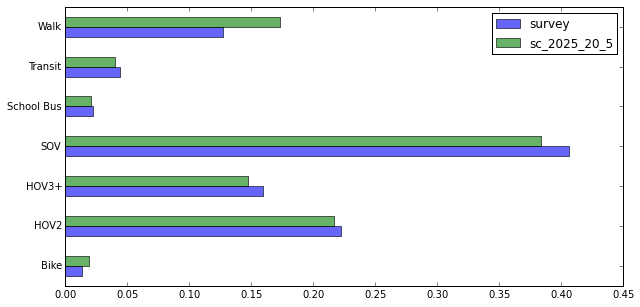

In [13]:
pd.options.display.float_format = '{:,.1%}'.format
dfplot = pd.DataFrame([df_dict[i].groupby('mode').sum()['trexpfac']/df_dict[i].sum()['trexpfac'] for i in df_dict.keys()]).T
dfplot = dfplot.drop('Other', axis=0)
dfplot.columns = df_dict.keys()
dfplot.plot(kind='barh', alpha=0.6, figsize=(10,5))
display(dfplot)